# Семинар 1: Разведочный анализ данных.

Решение любой задачи, связанной с машинным обучением, начинается с разведочного анализа данных. Перед тем, как строить модели, надо понять, сколько у нас данных и какая информация есть о каждом объекте, а также:
* выяснить, нет ли пропусков в данных (т.е. отсутствующих значений признаков у некоторых объектов);
* выяснить, нет ли выбросов (т.е. объектов, которые очень сильно отличаются от большинства, имеют неадекватные значения признаков);
* выяснить, нет ли повторов в данных;
* выяснить, нет ли нелогичной информации (например, если мы анализируем данные по кредитам, и видим запись, где кредит выдали пятилетнему ребёнку, то это странно).

И это лишь небольшой список проблем, которые можно выявить. Помимо этого с данными нужно в целом познакомиться, чтобы понять, какие признаки там можно сделать, какие из них будут наиболее полезны.

## Данные:

В машинном обучении данные удобно представлять в виде таблиц. Каждая строка отвечает объекту, а каждый столбец - признаку. Работа с таблицами в питоне реализована в библиотеке `pandas`.

https://pandas.pydata.org/docs/

In [ ]:
import numpy as np
import pandas as pd

Основной объект в `pandas` - это `DataFrame`. Его можно создать напрямую или прочитать из файла.

In [ ]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, 'E', -50]
})

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,E
3,7,40,-50


Данные можно скачать здесь: https://www.kaggle.com/c/titanic/data?select=train.csv .

In [ ]:
# Либо можно скачать так:
!wget https://raw.githubusercontent.com/SergeyKorpachev/math-faculty-ml/refs/heads/main/2026/seminars/seminar01/train.csv

--2026-02-01 20:50:12--  https://raw.githubusercontent.com/SergeyKorpachev/math-faculty-ml/refs/heads/main/2026/seminars/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.04s   

2026-02-01 20:50:12 (1.46 MB/s) - ‘train.csv’ saved [61194/61194]



In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Mетоды `.info()` и `.describe()` позволяют посмотреть на описание колонок и статистики по численным колонкам.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Также в `pandas` есть тип `Series`, который отвечает за строки и столбцы. Например, колонка в таблице - это `Series`.

In [ ]:
df["Name"] # или можно ещё df.Name

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


Можно оставить несколько колонок.

In [ ]:
df[["Name", "Age", "Ticket"]]

,Name,Age,Ticket
0,"Braund, Mr. Owen Harris",22.0,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599
2,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803
4,"Allen, Mr. William Henry",35.0,373450
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,211536
887,"Graham, Miss. Margaret Edith",19.0,112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,W./C. 6607
889,"Behr, Mr. Karl Howell",26.0,111369


А ещё `Series` ведёт себя как numpy массив и можно делать вот так:

In [ ]:
df[(df["Age"] > 20) & (df["Pclass"] == 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


Это также можно сделать (IMHO удобнее) через `.query`.

In [ ]:
df.query("Age > 20 & Pclass == 2")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


Для индексации по таблице также существуют два способа - через `.loc` и `.iloc`. Например:

In [ ]:
df.loc[4]

,4
PassengerId,5
Survived,0
Pclass,3
Name,"Allen, Mr. William Henry"
Sex,male
Age,35.0
SibSp,0
Parch,0
Ticket,373450
Fare,8.05


или можно получить один элемент

In [ ]:
df.loc[4, "Age"]

np.float64(35.0)

можно делать срезы таблицы

In [ ]:
df.loc[4:10, "Age"]

,Age
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0
10,4.0


In [ ]:
df.loc[4:10, "Pclass":"Age"]

,Pclass,Name,Sex,Age
4,3,"Allen, Mr. William Henry",male,35.0
5,3,"Moran, Mr. James",male,NaN
6,1,"McCarthy, Mr. Timothy J",male,54.0
7,3,"Palsson, Master. Gosta Leonard",male,2.0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0


`.iloc` далает то же самое, только не по названию колонок и индексу, а по номерам строк и столбцов.

In [ ]:
samples = df.sample(10)
samples

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.00,1,0,4137,9.8250,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34.00,1,0,244367,26.0000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.00,1,0,350025,7.8542,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.00,1,0,STON/O2. 3101279,15.8500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.00,0,0,349249,7.8958,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


In [ ]:
samples.loc[samples.index[3]]

,644
PassengerId,645
Survived,1
Pclass,3
Name,"Baclini, Miss. Eugenie"
Sex,female
Age,0.75
SibSp,2
Parch,1
Ticket,2666
Fare,19.2583


In [ ]:
samples.iloc[2] # если тут сделать для samples.index[3], то такого индекса может не быть

,99
PassengerId,100
Survived,0
Pclass,2
Name,"Kantor, Mr. Sinai"
Sex,male
Age,34.0
SibSp,1
Parch,0
Ticket,244367
Fare,26.0


In [ ]:
df.iloc[4:10, 2:5]

,Pclass,Name,Sex
4,3,"Allen, Mr. William Henry",male
5,3,"Moran, Mr. James",male
6,1,"McCarthy, Mr. Timothy J",male
7,3,"Palsson, Master. Gosta Leonard",male
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female


Также в таблицу можно добавлять новые колонки.

In [ ]:
import random

df["New column"] = df["Age"] ** ((3 - df["Pclass"]) / 5)
df["Surname"] = df["Name"].str.split(",").str[0]
df["Yet another column"] = df.apply(lambda row: random.random() * (row["Age"] + row["Pclass"]), axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New column,Surname,Yet another column
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.000000,Braund,15.975933
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.284631,Cumings,6.468679
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.000000,Heikkinen,22.177555
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.145980,Futrelle,33.456322
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.000000,Allen,4.043128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.933182,Montvila,5.718708
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.247143,Graham,11.124008
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.000000,Johnston,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.681199,Behr,6.084766


В данных бывают пропуски. Это важно учитывать. Заполнять пропуски необходимо в соответствии со смыслом колонки. Можно заполнять с помощью среднего, медианного, константного или других значений. Для этого обычно используется метод `.fillna()`.

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Также есть полезный метод `.groupby()`, который группируюет объекты таблици по значениям колонки. Например:

In [ ]:
df.groupby("Sex")["Fare"].mean()

,Fare
Sex,
female,44.479818
male,25.523893


In [ ]:
df.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

## Визуализация

Но куда приятнее изучать данные с помощью картинок. Для такого тоже есть библиотеки, например, `seaborn`.

Полезные ссылки:
- https://www.python-graph-gallery.com/
- https://seaborn.pydata.org/examples/index.html

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

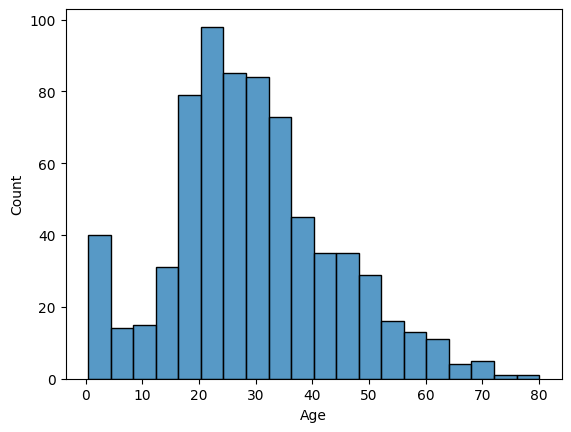

In [ ]:
sns.histplot(data=df, x="Age")

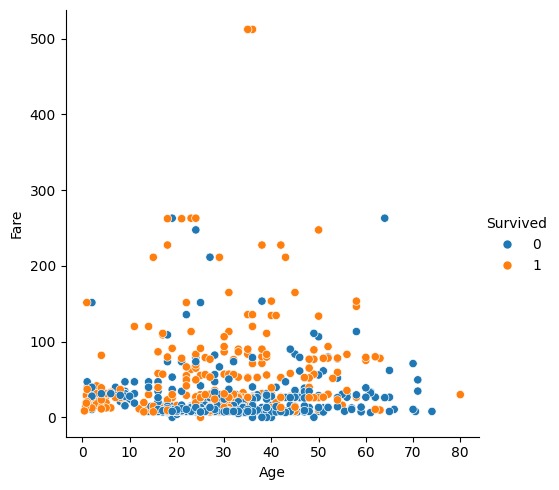

In [ ]:
sns.relplot(data=df, x="Age", y="Fare", hue="Survived")

<Axes: xlabel='Embarked', ylabel='Age'>

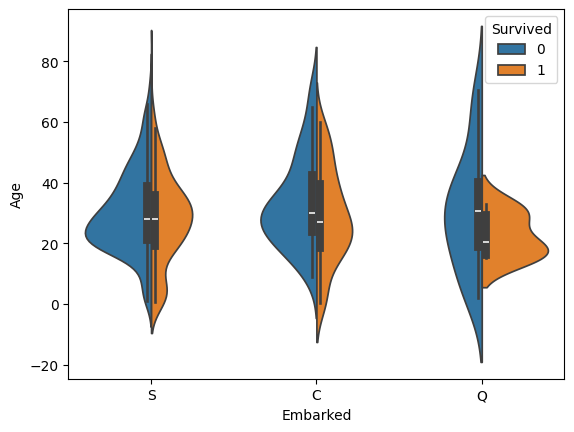

In [ ]:
sns.violinplot(data=df, x="Embarked", y="Age", hue="Survived", split=True)

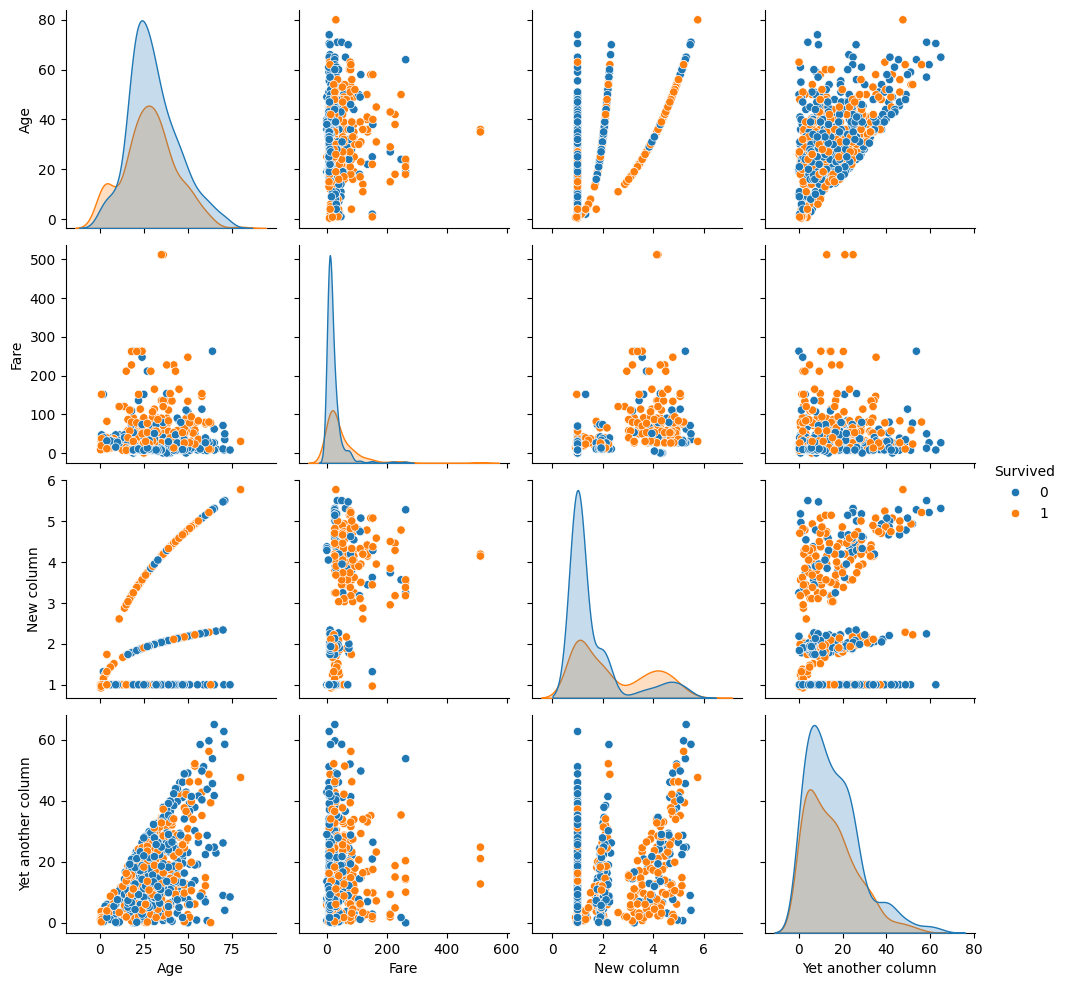

In [ ]:
cols = ["Age", "Fare", "New column", "Yet another column", "Survived"]

sns.pairplot(data=df[cols], hue="Survived") # это может занять какое-то время

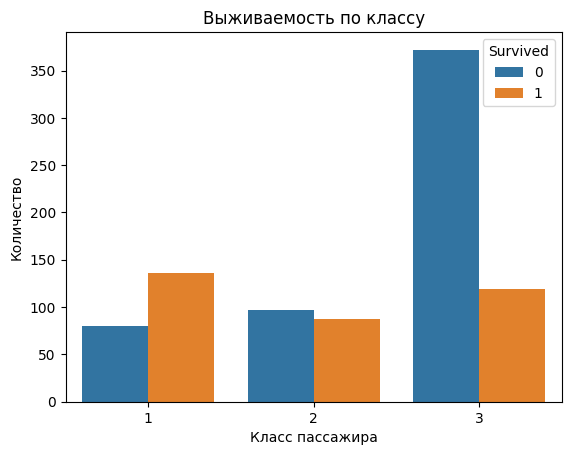

In [ ]:
# Упражнение: выживаемость по классу.
# Постройте столбчатую диаграмму (countplot) выживыемости пассажира относительно его класса.
# Сделайте подписи (title, xlabel, ylabel) к осям и к самой диаграмме.

# Ваш код сюда :)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Выживаемость по классу')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество');

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
california_housing_df = california_housing.frame
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<Axes: >

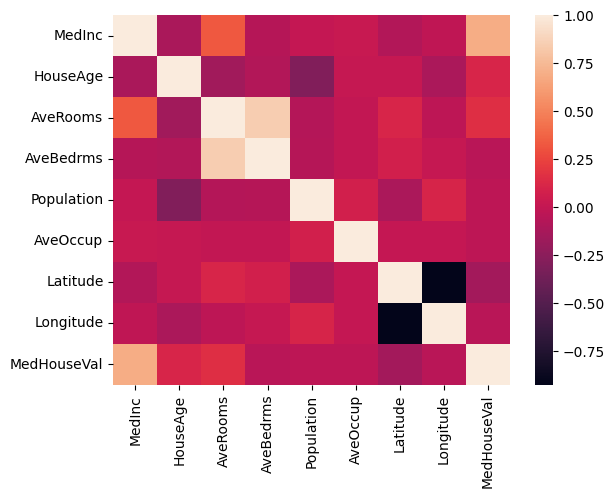

In [ ]:
sns.heatmap(california_housing_df.corr())

<Axes: xlabel='Longitude', ylabel='Latitude'>

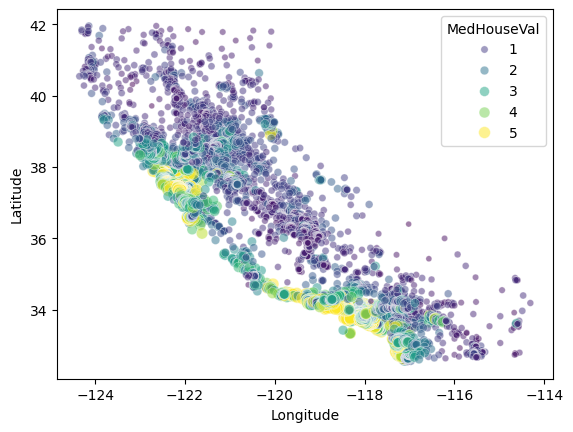

In [ ]:
sns.scatterplot(data=california_housing_df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)

In [ ]:
bins = pd.qcut(california_housing_df["MedHouseVal"], 6, retbins=False)

california_housing_df["MedHouseValBin"] = bins.apply(lambda x: x.mid)

<Axes: xlabel='MedInc', ylabel='Count'>

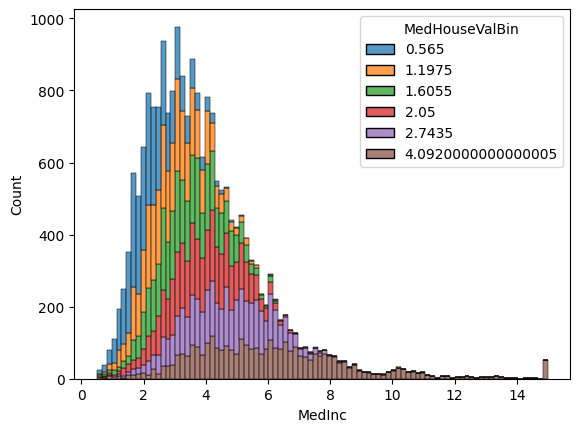

In [ ]:
sns.histplot(data=california_housing_df, x="MedInc", hue="MedHouseValBin", multiple="stack")

<Axes: xlabel='AveRooms', ylabel='AveOccup'>

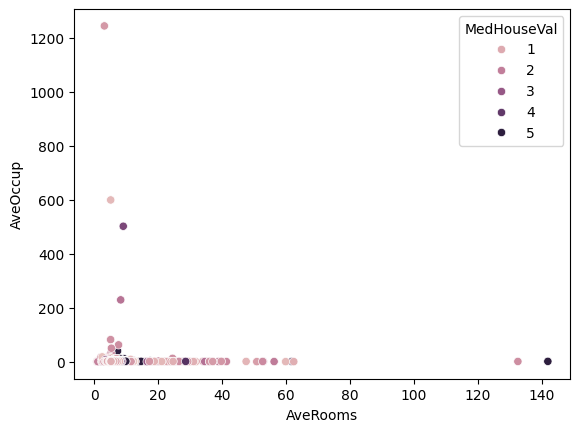

In [ ]:
sns.scatterplot(data=california_housing_df, x="AveRooms", y="AveOccup", hue="MedHouseVal")

<Axes: xlabel='AveRooms', ylabel='AveOccup'>

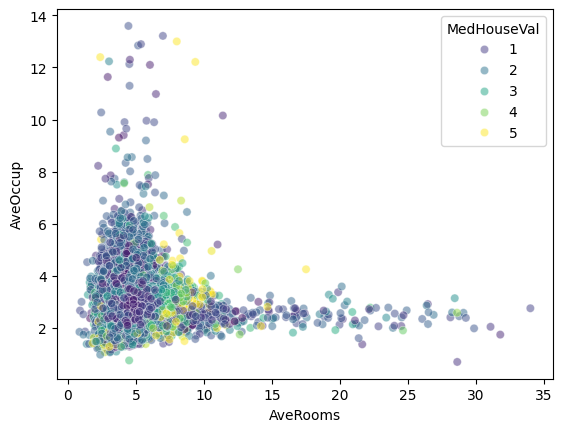

In [ ]:
california_housing_filt = california_housing_df.query("AveOccup < AveOccup.quantile(0.999) & AveRooms < AveRooms.quantile(0.999)")
sns.scatterplot(california_housing_filt, x="AveRooms", y="AveOccup",
                hue="MedHouseVal", alpha=0.5, palette="viridis")

Давайте посмотрим на население.

<Axes: xlabel='Population', ylabel='Count'>

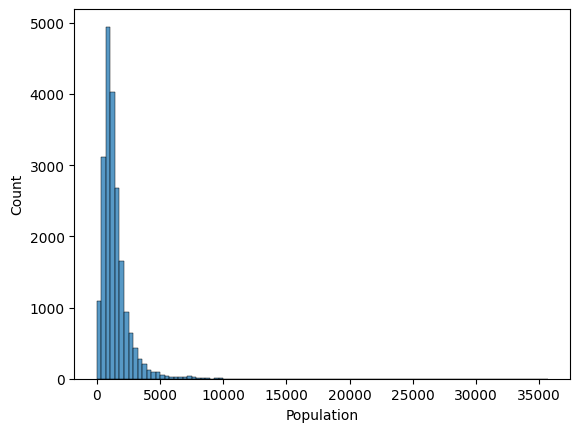

In [ ]:
sns.histplot(data=california_housing_df["Population"], bins=100)

<Axes: xlabel='Population', ylabel='Count'>

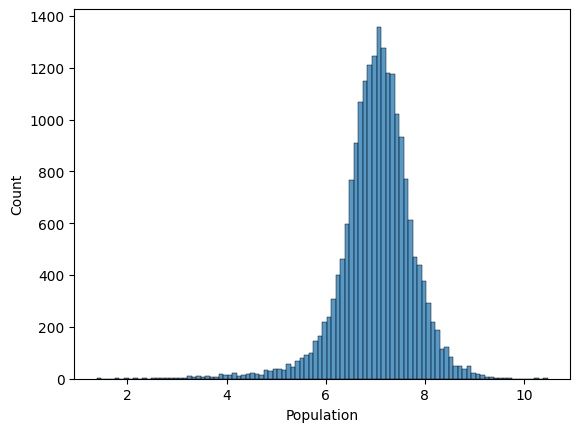

In [ ]:
sns.histplot(data=np.log1p(california_housing_df["Population"]), bins=100)

## DIY: Japan credit screening data

https://archive.ics.uci.edu/ml/datasets/Japanese+Credit+Screening

Помогите Даше изучить данные японского кредитного скрининга.

<img src="https://www.meme-arsenal.com/memes/e9e029d4bb638ba6156361ffbe3e41f8.jpg"
     width="400"
     height="auto">

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2026-02-01 20:51:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘crx.data’

crx.data                [ <=>                ]  31.46K  --.-KB/s    in 0.1s    

2026-02-01 20:51:40 (237 KB/s) - ‘crx.data’ saved [32218]



In [ ]:
column_names = [f"A{i}" for i in range(1, 17)]
data = pd.read_csv("./crx.data", names=column_names, na_values="?")
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
# Проанализируйте это досконально!